# Business problem

Since 2008, guests and hosts have used AirBNB to expand on travelling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in San Diego, California for 2019. 

# Data Understanding

The dataset contains various columns describing Airbnb listings in Amsterdam. Here are some columns of interest:

1. host_id: Unique identifier for hosts.  
2. price: Price per night for the listing.  
3. neighborhood: Neighborhood where the listing is located.  
4. reviews: Number of reviews for the listing.    
5. overall_satisfaction: Rating of the listing.  
6. room_type: Type of room offered (e.g., Shared room).  
7. accommodates: Number of people the listing can accommodate.  

# Objectives: Research Questions

1. Regarding the Host:  
a) Who are top earners.  
b) Is there any relationship between monthly earning and prices.
   
2. Regarding the Neighbourhood:  
a) Any particular location getting maximum number of bookings.  
b) Price relation with respect to location.

3. Regarding the reviews:    
a) Relationship between Quality and Price.
 
4. Regarding Price:  
a) Price vs amenitites.  
b) Price vs location.

Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
# Load the data from csv file
df = pd.read_csv('airbnb-prices.csv')

# Data Understanding

In [3]:
# Display the number of rows and columns in dataframe
df.shape

(18723, 20)

In [4]:
# Display random 5 rows from dataset
df.sample(5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
17648,15245131,1476,12919491,Private room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,0,0.0,1,1.0,NaN,78.0,NaN,"Nice room near Rai and Station Amstel, wifi",2017-07-22 16:09:01.837727,52.347346,4.910591,0101000020E6100000B42094F771A41340BE326FD5752C...
11682,15953903,1476,103583710,Entire home/apt,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,10,5.0,4,1.0,NaN,118.0,NaN,Great apartment in 'De Pijp' on the ground floor,2017-07-22 17:57:05.271389,52.356234,4.888138,0101000020E6100000E256410C748D134094DC6113992D...
16014,9681671,1476,50011812,Private room,NaN,Amsterdam,NaN,Centrum West,73,4.5,4,1.0,NaN,174.0,NaN,Unique city centre house (Jordaan),2017-07-22 16:34:51.160837,52.375201,4.882074,0101000020E61000008D9B1A683E87134097361C960630...
6429,10935717,1476,19895390,Entire home/apt,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,3,5.0,2,1.0,NaN,150.0,NaN,Luxurious apartment in Amsterdam,2017-07-22 22:47:28.829066,52.352686,4.898284,0101000020E61000008C14CAC2D7971340E7E099D0242D...
18429,7864246,1476,10591878,Private room,NaN,Amsterdam,NaN,Oud Oost,5,4.5,2,1.0,NaN,48.0,NaN,Cozy room close to the center!,2017-07-22 16:05:50.562783,52.358623,4.927951,0101000020E6100000782975C938B61340F54BC45BE72D...


In [5]:
# Display a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

In [6]:
# Display descriptive statistics
df.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.872300e+04,18723.0,1.872300e+04,0.0,0.0,18723.000000,18723.000000,18723.000000,18723.000000,0.0,18723.000000,0.0,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,NaN,NaN,16.741548,3.301127,2.922021,1.430380,NaN,166.599477,NaN,52.365261,4.888585
std,6.082192e+06,0.0,3.758103e+07,NaN,NaN,33.522630,2.213558,1.327524,0.879019,NaN,108.943849,NaN,0.015142,0.034537
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.050608e+06,1476.0,7.140879e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355254,4.864344
50%,1.228287e+07,1476.0,1.988641e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364628,4.885994
75%,1.661084e+07,1476.0,5.202680e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374797,4.907480
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


# Data Cleaning

In [7]:
# Check for missing values
df.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [8]:
# Drop rows with missing values in name column
df.dropna(subset= "name", axis = 0, inplace=True)

In [9]:
# Drop columns with most missing values (country, borough, bathrooms and minstay)
df.drop(columns= ['country', 'borough', 'bathrooms', 'minstay'], inplace= True)

In [10]:
# Check for missing values
df.isnull().sum()

room_id                 0
survey_id               0
host_id                 0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
last_modified           0
latitude                0
longitude               0
location                0
dtype: int64

In [11]:
# Display the number of rows and columns in dataframe after handling missing values
df.shape

(18671, 16)

In [12]:
# check number of duplicated rows
df.duplicated().sum()

0

In [13]:
# Convert "last_modified" coloum data type from object to datetime
df['last_modified'] = pd.to_datetime(df['last_modified'])

# Create new columns for date and Extract date from "last_modified" column
df['last_modified_date'] = df['last_modified'].dt.date

# Convert "last_modified_date" coloum data type from object to datetime
df['last_modified_date'] = pd.to_datetime(df['last_modified_date'])

In [14]:
# Display concise summary of a DataFrame after changing data type and handling missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18671 entries, 0 to 18722
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   room_id               18671 non-null  int64         
 1   survey_id             18671 non-null  int64         
 2   host_id               18671 non-null  int64         
 3   room_type             18671 non-null  object        
 4   city                  18671 non-null  object        
 5   neighborhood          18671 non-null  object        
 6   reviews               18671 non-null  int64         
 7   overall_satisfaction  18671 non-null  float64       
 8   accommodates          18671 non-null  int64         
 9   bedrooms              18671 non-null  float64       
 10  price                 18671 non-null  float64       
 11  name                  18671 non-null  object        
 12  last_modified         18671 non-null  datetime64[ns]
 13  latitude             

In [15]:
# Handling Outliers

In [16]:
# Function to check count of outliers in Column
def outliers_count(df, col):
    """
    this function takes (dataframe, column) as input and returns lower_threshold, Q1, Q3, upper_threshold, IQR, count_of_outliers.
    eg: outliers_count(df, "col")
    """
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5*IQR
    lower_threshold = Q1 - 1.5*IQR

    count_of_outliers = 0

    for num in df[col]:
        if num > upper_threshold or num < lower_threshold:
            count_of_outliers += 1
            
    return (f"\nlower_threshold = {lower_threshold} \nQ1 = {Q1} \nQ3 = {Q3} \nupper_threshold = {upper_threshold} \nIQR = {IQR} \ncount_of_outliers = {count_of_outliers}")

In [17]:
# Print count of outliers in reviews column
print('Reviews :', outliers_count(df, "reviews"))

Reviews : 
lower_threshold = -20.5 
Q1 = 2.0 
Q3 = 17.0 
upper_threshold = 39.5 
IQR = 15.0 
count_of_outliers = 1837


In [18]:
# Print count of outliers in "reviews" column
print('Price :', outliers_count(df, "price"))

Price : 
lower_threshold = -18.0 
Q1 = 108.0 
Q3 = 192.0 
upper_threshold = 318.0 
IQR = 84.0 
count_of_outliers = 1028


In [19]:
# Function to drop rows containing outliers in Column and return box plot of that column
def drop_outliers(df, col):
    """
    this function takes (dataframe, column) as input and returns new dataset after removing all outliers.
    eg: drop_outliers(df, "col")
    """
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5*IQR
    lower_threshold = Q1 - 1.5*IQR

    # Create a new dataframe that excludes outliers
    new_df = df[(df[col] > lower_threshold) & (df[col] < upper_threshold)]

    return new_df

We have not drop any outliers from 'reviews' and 'price' columns becouse it is possible that it can be a real value.

# Data After Cleaning

In [20]:
# Display number of rows and column
df.shape

(18671, 17)

In [21]:
# Display concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18671 entries, 0 to 18722
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   room_id               18671 non-null  int64         
 1   survey_id             18671 non-null  int64         
 2   host_id               18671 non-null  int64         
 3   room_type             18671 non-null  object        
 4   city                  18671 non-null  object        
 5   neighborhood          18671 non-null  object        
 6   reviews               18671 non-null  int64         
 7   overall_satisfaction  18671 non-null  float64       
 8   accommodates          18671 non-null  int64         
 9   bedrooms              18671 non-null  float64       
 10  price                 18671 non-null  float64       
 11  name                  18671 non-null  object        
 12  last_modified         18671 non-null  datetime64[ns]
 13  latitude             

In [22]:
# Display first 5 rows of DataFrame
df.head()

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location,last_modified_date
0,10176931,1476,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...,2017-07-23
1,8935871,1476,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...,2017-07-23
2,14011697,1476,10346595,Shared room,Amsterdam,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...,2017-07-23
3,6137978,1476,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...,2017-07-23
4,18630616,1476,70191803,Shared room,Amsterdam,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...,2017-07-23


# Save Cleaned Data to new csv file 

In [23]:
df.to_csv("cleaned_airbnb-prices-data.csv", index=False)

# Load cleaned Dataset

In [24]:
# load Cleaned Dataset as data
data = pd.read_csv("cleaned_airbnb-prices-data.csv")

In [25]:
# Display random 5 rows from dataset
data.sample(5)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location,last_modified_date
13099,16023781,1476,104225051,Entire home/apt,Amsterdam,Oud Oost,0,0.0,3,1.0,103.0,Apartment in Amsterdam east,2017-07-22 17:37:08.030412,52.355221,4.921485,0101000020E6100000AB048BC399AF13401CEDB8E1772D...,2017-07-22
12485,13664635,1476,10734975,Entire home/apt,Amsterdam,Oud Oost,8,5.0,2,1.0,114.0,Beautiful comfortable apartment at the Oosterpak,2017-07-22 17:50:32.551404,52.359511,4.913647,0101000020E6100000A35A441493A71340B0C6D974042E...,2017-07-22
13653,886192,1476,4698057,Entire home/apt,Amsterdam,Noord Oost,14,4.5,4,2.0,108.0,Luxurious and spacious mobile home,2017-07-22 17:49:52.052489,52.384751,5.013557,0101000020E61000000987DEE2E10D1440390D51853F31...,2017-07-22
7126,18163083,1476,20568332,Entire home/apt,Amsterdam,Oud Oost,3,5.0,4,2.0,180.0,"Great Location! Spacious, Sunny & Clean Apartment",2017-07-22 22:32:47.127153,52.356346,4.914821,0101000020E6100000ACC612D6C6A81340BC07E8BE9C2D...,2017-07-22
9471,25428,1476,56142,Entire home/apt,Amsterdam,Centrum West,0,0.0,3,1.0,132.0,Lovely apt in City Centre (Jordaan),2017-07-22 20:04:15.871553,52.373114,4.883668,0101000020E61000004016A243E088134002D71533C22F...,2017-07-22


# Exploratory Data Analysis (EDA)

# 1. Regarding the Host:

[A]. Who are top earners.   
To find the top earners, we need to aggregate the earnings of each host and identify those with the highest total earnings.

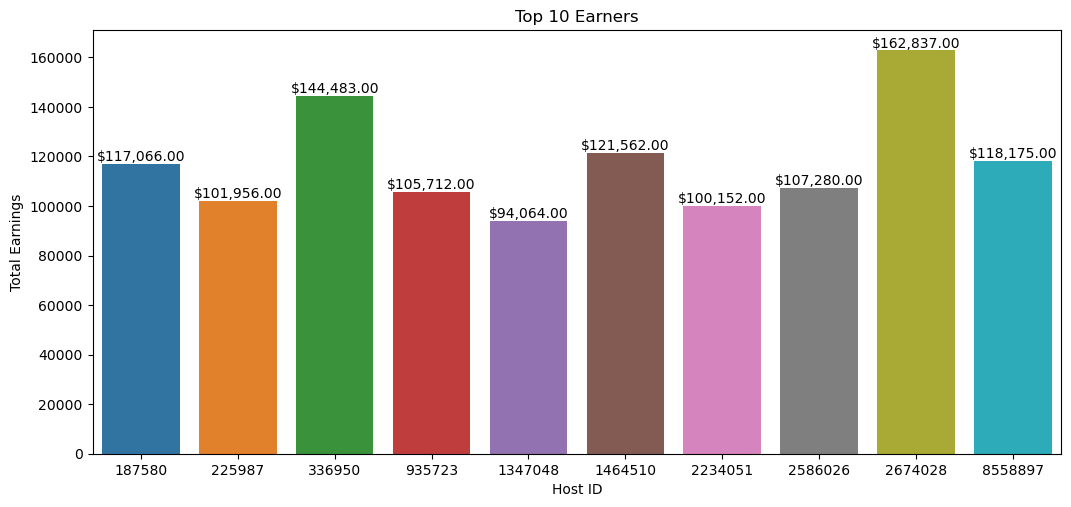

Top 3 earners by occupation values


,host_id,Total_earnings
0,2674028,162837.0
1,336950,144483.0
2,1464510,121562.0


In [26]:
# Calculate total earnings
data["Total_earnings"] = data['price'] * data['reviews']

# Calculate top 10 earners
top_earners_id = data.groupby("host_id")["Total_earnings"].sum().sort_values(ascending=False).head(10)

# Plotting bar chart
plt.figure(figsize=(12.5,5.5))
bars = sns.barplot(x = top_earners_id.index, y = top_earners_id.values)

# Add labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, f"${height:,.2f}", ha="center", va="bottom")

plt.title("Top 10 Earners")
plt.xlabel("Host ID")
plt.ylabel("Total Earnings")
plt.show()

# print top 3 earners by occupation values 
print("Top 3 earners by occupation values")
top_earners_id.reset_index().head(3)

Inference:  
Host ID 2674028 has the highest earnings. This indicates that this host either has multiple listings or high-priced listings that are frequently booked. This host might offer premium services or have listings in highly sought-after locations.

[B]. Is there any relationship between monthly earning and prices.    
To analyze this, we can calculate the correlation between the average monthly earnings and the average listing price.

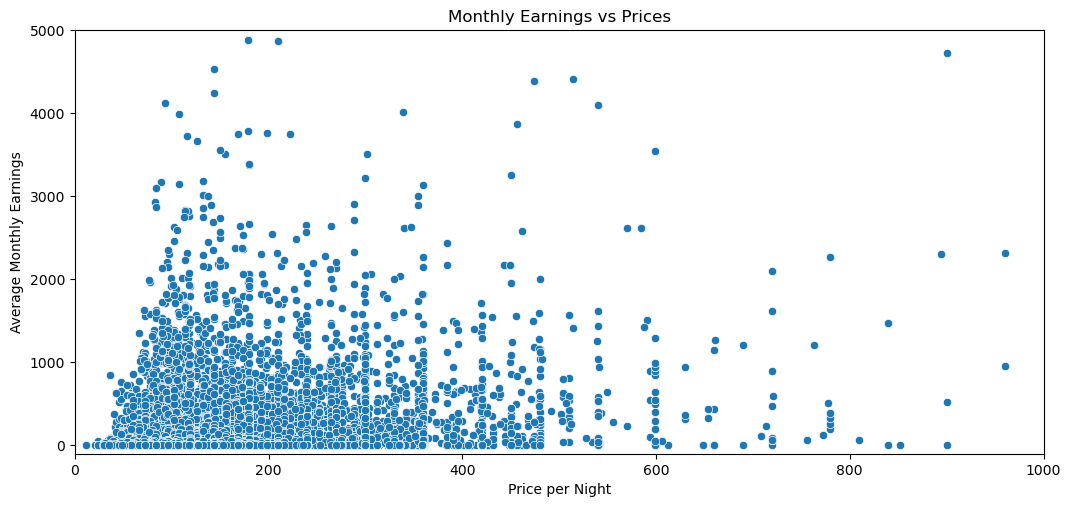

Correlation between monthly earnings and price: 0.15


In [27]:
# Calculating Monthly Earnings
data['monthly_earnings'] = data['price'] * data['reviews'] / 12
monthly_earnings = data.groupby("host_id")["monthly_earnings"].mean().reset_index()
average_price = data.groupby('host_id')['price'].mean().reset_index()

# Merge dataframes
earnings_price_df = pd.merge(monthly_earnings, average_price, on='host_id')


# Plotting Scatter Plot
plt.figure(figsize=(12.5, 5.5))
sns.scatterplot(x='price', y='monthly_earnings', data= earnings_price_df)
plt.xlim(0,1000)
plt.ylim(-100,5000)
plt.title('Monthly Earnings vs Prices')
plt.xlabel('Price per Night')
plt.ylabel('Average Monthly Earnings')
plt.show()

# Calculate correlation
correlation = earnings_price_df['monthly_earnings'].corr(earnings_price_df['price']).round(2)
print(f"Correlation between monthly earnings and price: {correlation}")

Inference:  
The correlation between monthly earnings and price is 0.15, indicating a weak positive relationship. This suggests that while higher prices may contribute to increased earnings, other factors like booking frequency and occupancy rates also play significant roles in determining monthly earnings.

# 2. Regarding the Neighbourhood:

[A].  Any particular location getting maximum number of bookings.    
We can determine this by summing the number of reviews for each neighborhood, as reviews can serve as a proxy for bookings.

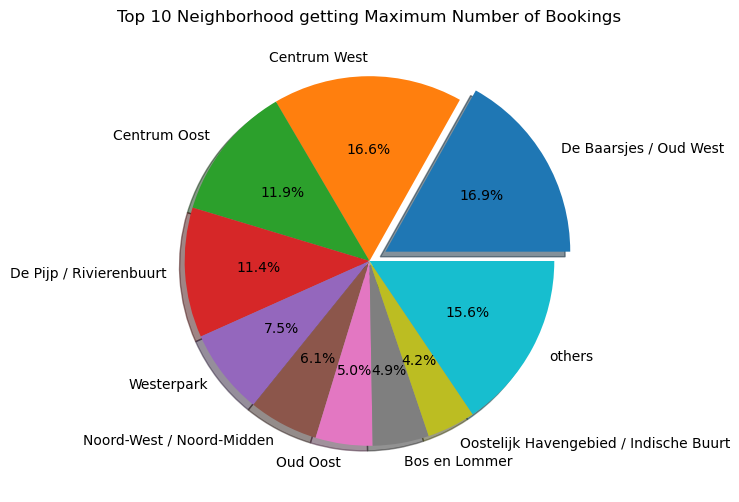

Neighborhoods getting maximum number of bookings


,neighborhood,reviews
7,De Baarsjes / Oud West,52769


In [28]:
# Calculate total numbers of Bookings by neighborhood
neighborhood_bookings = data.groupby('neighborhood')['reviews'].sum().reset_index().sort_values(by='reviews', ascending=False)

# Calculate the sum of bookings for all neighborhoods beyond the top 9
others = neighborhood_bookings['reviews'][9:].sum()

# Create a new dataframe with the top 10 neighborhoods and the "others" category
top_10_neighborhood_bookings = neighborhood_bookings.head(9)
top_10_neighborhood_bookings.loc[10] = ['others', others]

# Plotting Pie chart
plt.figure(figsize=(12.5,6))

# Shadow
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

plt.pie(top_10_neighborhood_bookings.reviews, labels= top_10_neighborhood_bookings.neighborhood, autopct = '%1.1f%%', explode= explode, shadow= True)
plt.title("Top 10 Neighborhood getting Maximum Number of Bookings")
plt.show()

# Display Neighborhoods getting maximum number of bookings
print("Neighborhoods getting maximum number of bookings")
top_10_neighborhood_bookings.head(1)

Inference:  
The "De Baarsjes / Oud West" neighborhood is receiving the highest number of bookings, accounting for 16.9% of overall bookings, followed by the "Centrum West" neighborhood, which accounts for 16.6% of overall bookings. These areas likely offer attractive amenities, proximity to popular attractions, or a high concentration of listings, making them popular choices for guests.

[B]. Price relation with respect to location.  
We can visualize this using bar plot check if there are significant differences in average prices across neighborhoods.

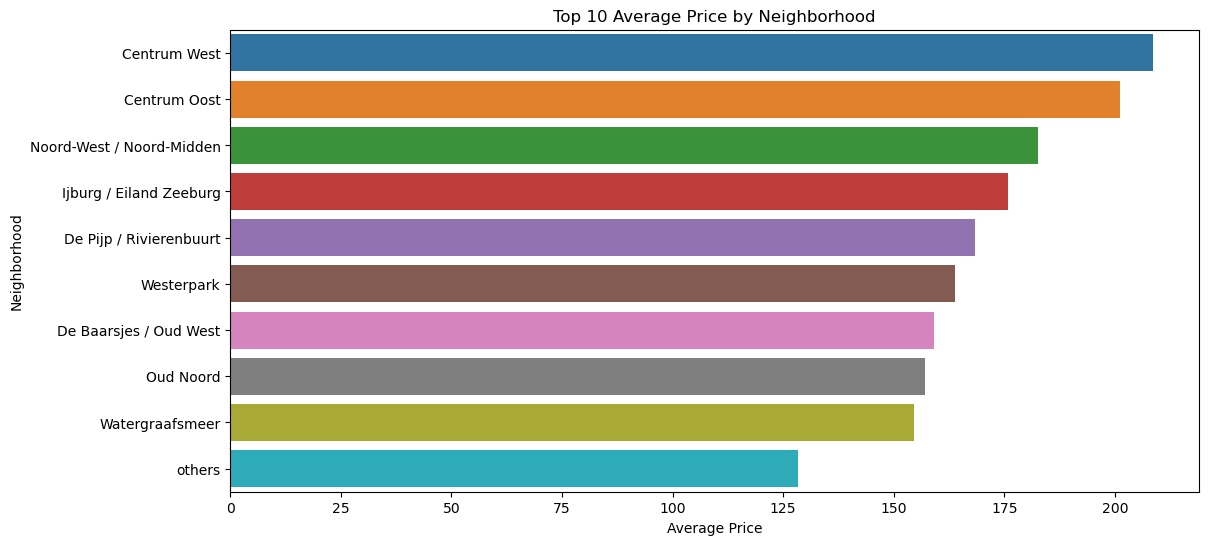

Top 3 Neighborhood by Average price


,neighborhood,price
5,Centrum West,208.561372
4,Centrum Oost,201.202664
14,Noord-West / Noord-Midden,182.698940


In [29]:
# Calculating average price by neighborhood
average_price_by_neighborhood = data.groupby("neighborhood")["price"].mean().reset_index().sort_values(by = 'price', ascending = False)

# Calculate the averave price for all neighborhoods beyond the top 9
others = average_price_by_neighborhood['price'][9:].mean()

# Create a new dataframe with the top 10 neighborhoods and the "others" category
top_10_avg_price_by_neighborhood = average_price_by_neighborhood.head(9)
top_10_avg_price_by_neighborhood.loc[10] = ['others', others]


# Visualize the average prices using a bar plot
plt.figure(figsize=(12.5, 6))
sns.barplot(x='price', y='neighborhood', data=top_10_avg_price_by_neighborhood)
plt.title('Top 10 Average Price by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

# Print Top 3 Neighborhood by Average price
print("Top 3 Neighborhood by Average price")
top_10_avg_price_by_neighborhood.head(3)

Inference:  
There is a Significant differences in prices across neighborhoods. Which indicate that location plays a crucial role in determining listing prices. Popular or premium locations, like "Centrum West", "Centrum Oost", tend to have higher prices. Hosts can leverage this information to set competitive prices based on their listing's location.

# 3. Regarding the reviews:

[A]. Relationship between Quality and Price.   
We can use the review scores as a proxy for quality and analyze the correlation with price.

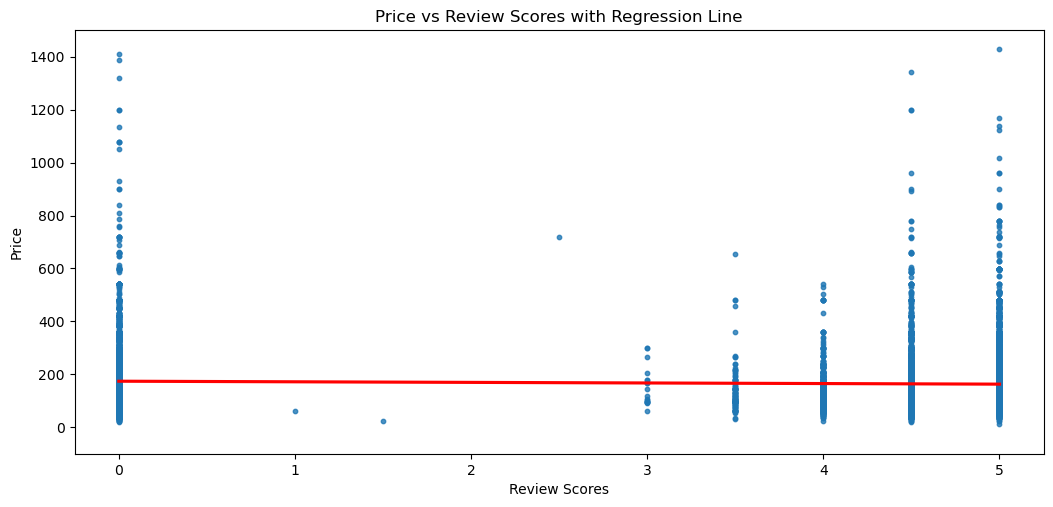

correlation between overall_satisfaction and price is -0.05


In [30]:
# Regression plot to visualize the trend
plt.figure(figsize=(12.5, 5.5))
sns.regplot(x='overall_satisfaction', y='price', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.ylim(-100,1500)
plt.title('Price vs Review Scores with Regression Line')
plt.xlabel('Review Scores')
plt.ylabel('Price')
plt.show()

# Calculate the correlation 
correlation = data['overall_satisfaction'].corr(data['price']).round(2)
print(f"correlation between overall_satisfaction and price is {correlation}")

Inference:  
The very weak negative correlation (-0.05) suggests that higher prices do not necessarily lead to higher review scores.   
This indicates that guests' satisfaction, as reflected in their review scores, is influenced by factors other than price. These factors could include the quality of amenities, cleanliness, accuracy of the listing description, responsiveness of the host, location, and overall experience.   
Both high and low-priced listings can receive high or low review scores, suggesting that providing a high-quality experience is more critical than the price itself in achieving good reviews.

# 4. Regarding Price:

[A]. Price vs Amenitites.  
We can use the number of accommodates and bedrooms as proxies for amenities and analyze their relationship with price.

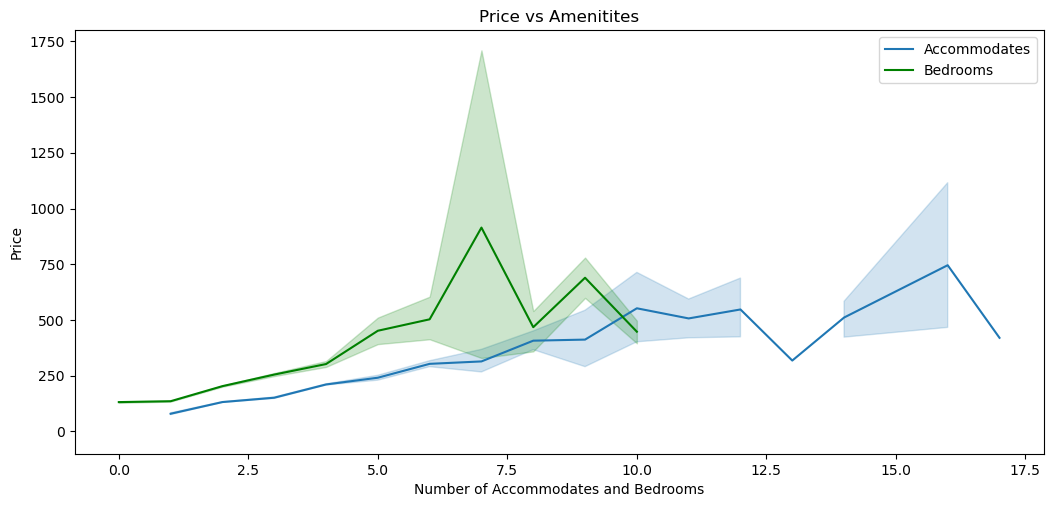

Correlation between Price and Accomodates is 0.5
Correlation between Price and Bedrooms is 0.45


In [31]:
# Line plot for Price vs Accommodates and Bedrooms
plt.figure(figsize=(12.5, 5.5))
sns.lineplot(x='accommodates', y='price', data= data, label= "Accommodates")
sns.lineplot(x='bedrooms', y='price', data= data, label= "Bedrooms", c='g')
plt.ylim(-100,1800)
plt.title('Price vs Amenitites')
plt.xlabel('Number of Accommodates and Bedrooms')
plt.ylabel('Price')
plt.show()

# correlation of Price vs Accommodates
correlation_price_accomodates = data['price'].corr(data['accommodates']).round(2)
print(f"Correlation between Price and Accomodates is {correlation_price_accomodates}")

# correlation of Price vs Bedrooms
correlation_price_bedrooms = data['price'].corr(data['bedrooms']).round(2)
print(f"Correlation between Price and Bedrooms is {correlation_price_bedrooms}")

Inference:  

The correlation between price and the number of accommodates is 0.5, indicating a moderate positive relationship. Listings that can accommodate more guests tend to have higher prices.  
The correlation between price and the number of bedrooms is 0.45, also indicating a moderate positive relationship. Listings with more bedrooms are priced higher.  
  
This suggests that properties with more amenities and space (such as more accommodations and bedrooms) can command higher prices.

[B]. Price vs Location  

This has already been addressed in the neighborhood section, using visualizations to understand the impact of location on price.

# Conclusion

The analysis reveals several key insights:

1. Top Earners: Host ID 2674028, 336950	and 1464510 are top 3 earners, indicating successful listing strategies.
   
2. Monthly Earnings and Prices: A weak positive correlation (0.15) exists between monthly earnings and prices, suggesting that higher prices may contribute to increased earnings, but other factors also play a role.
   
3. Maximum Bookings: "De Baarsjes / Oud West" and "Centrum West" are the neighborhoods with the most bookings, likely due to their attractive features and location.
   
4. Price Differences Across Neighborhoods: There is a Significant price differences across neighborhoods. Which highlight the importance of location in pricing strategies.
   
5. Quality and Price: A very weak negative correlation (-0.05) between overall satisfaction and price indicates that higher prices do not necessarily lead to better review scores.
    
6. Price and Amenities: Moderate positive correlations between price and the number of accommodates (0.5) and bedrooms (0.45) suggest that listings with more amenities and space are priced higher.
   
These findings can help hosts optimize their listings and pricing strategies based on location, amenities, and guest preferences. They provide valuable insights for potential hosts on where to list their properties and how to enhance guest satisfaction.